## 1. Data Cleaning, Pre-Processing and Basic Exploratory Data Analysis (EDA)

In [1]:
# 1.Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading Dataset

df = pd.read_csv("Titanic-Dataset.csv")

# 3.Renaming Columns using regex

import re

df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_',col).lower() for col in df.columns]

# 4.Creating New Feature

df['family_size'] = df['sib_sp'] + df['parch'] + 1

df.drop(['sib_sp', 'parch'], axis = 1, inplace = True)

# 5.Handling Null Values

def basic_impute(df):
    
    df.drop(columns='cabin', inplace=True)
    
    # For numerical columns
    df['age'].fillna(df['age'].mean(), inplace = True)
    
    # For Categorical Columns
    df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
    return df


df1 = basic_impute(df)

# 6.Converting Categorical Features into Numerical Features

from sklearn.preprocessing import LabelEncoder

def one_hot_encoding(df,column):
    df = pd.get_dummies(df, columns = [column], drop_first=False)
    # drop_first=False to avoid Multi-collinearity
    return df

df1 = one_hot_encoding(df1, 'embarked')
df1 = one_hot_encoding(df1, 'sex')

# 7.Detecting Outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# 8.Handling Outliers 

def iqr_based_capping(df, column, iqr_multiplier=1.5):
    
    df_copy = df.copy()
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_copy

df1 = iqr_based_capping(df1, 'age', iqr_multiplier=1.5)
df1 = iqr_based_capping(df1, 'fare', iqr_multiplier=1.5)
df1 = iqr_based_capping(df1, 'family_size', iqr_multiplier=1.5)

## 2.Advanced Exploratory Data Analysis (EDA)

In [2]:
df1.head(2)

,passenger_id,survived,pclass,name,age,ticket,fare,family_size,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,2.0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,65.6344,2.0,1,0,0,1,0


### 2.1 Univariate Analysis

--> Defining the numerical and categorical features

In [3]:
numerical_features = ['age', 'fare', 'family_size']

categorical_features = ['pclass', 'survived', 'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male']

#### 2.1.1 Univariate Analysis for Numerical Features

#### Histogram

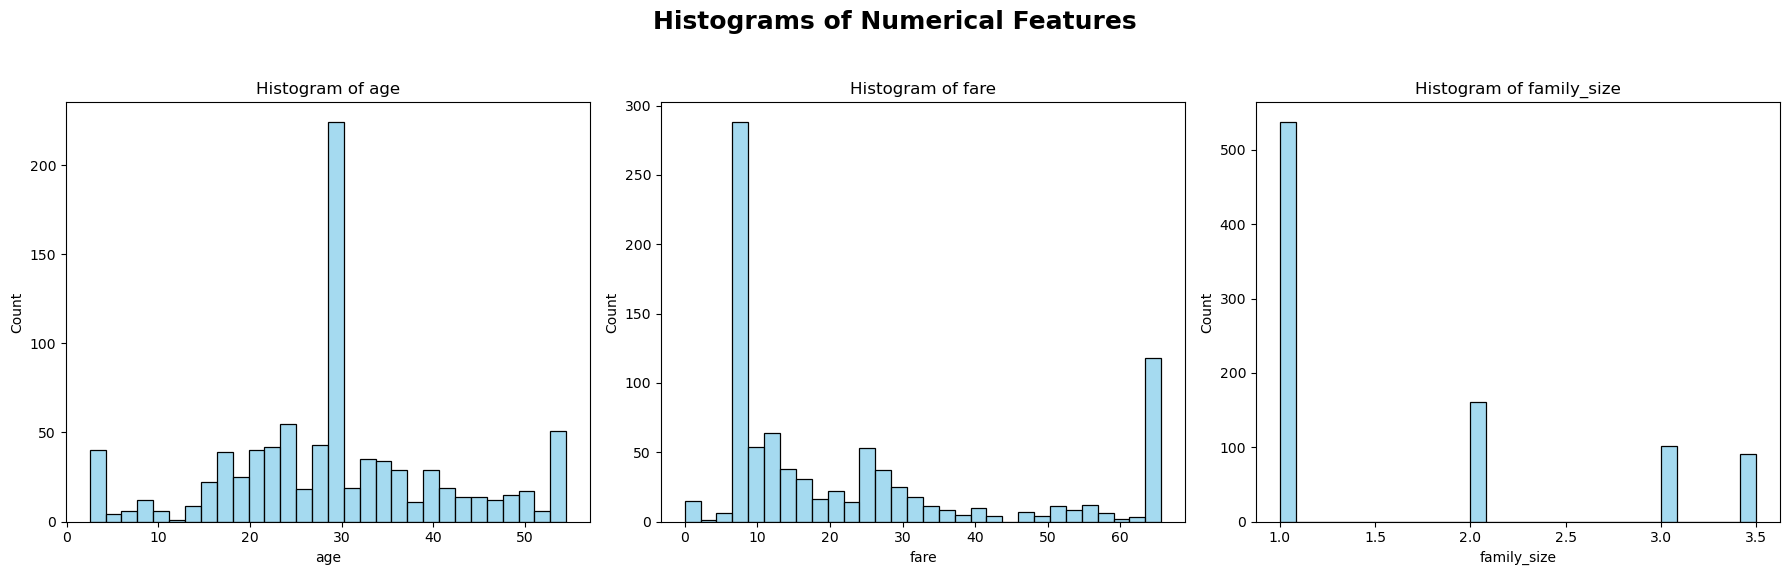

In [4]:
# Create a single row with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Set a shared title
fig.suptitle("Histograms of Numerical Features", fontsize=18, weight='bold')

# Loop through each feature and its corresponding axis
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df1, x=feature, ax=ax[i], bins=30, kde=False, color='skyblue')
    ax[i].set_title(f'Histogram of {feature}')
    ax[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### KDE Plots

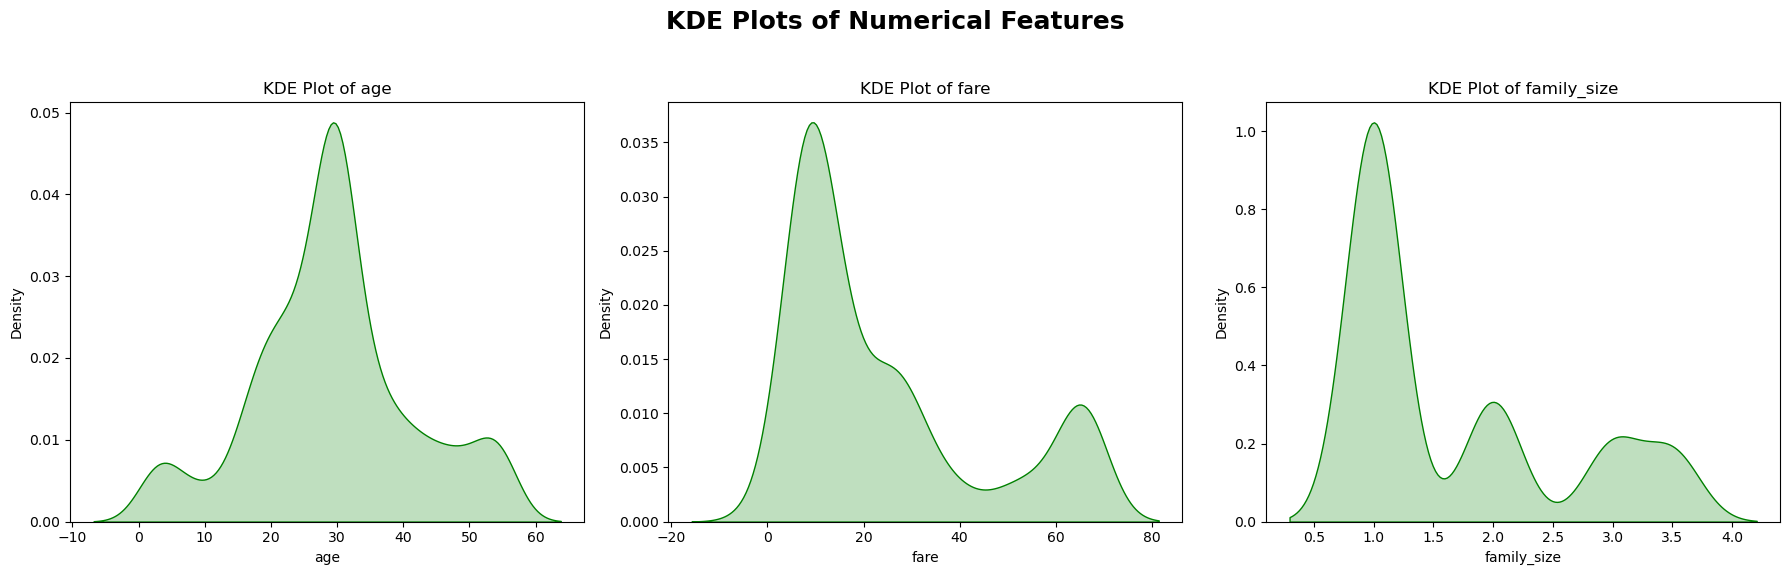

In [5]:
# Create a single row with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Set a shared title
fig.suptitle("KDE Plots of Numerical Features", fontsize=18, weight='bold')

# Loop through each feature and its corresponding axis
for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=df1, x=feature, ax=ax[i], fill=True, color='green')
    ax[i].set_title(f'KDE Plot of {feature}')
    ax[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Passengers of age 30 were of the highest count/density.
- Most common fare was 10 units and then around 70 units
- Most of the passengers came aboard alone and did not bring their family.

#### Box Plots

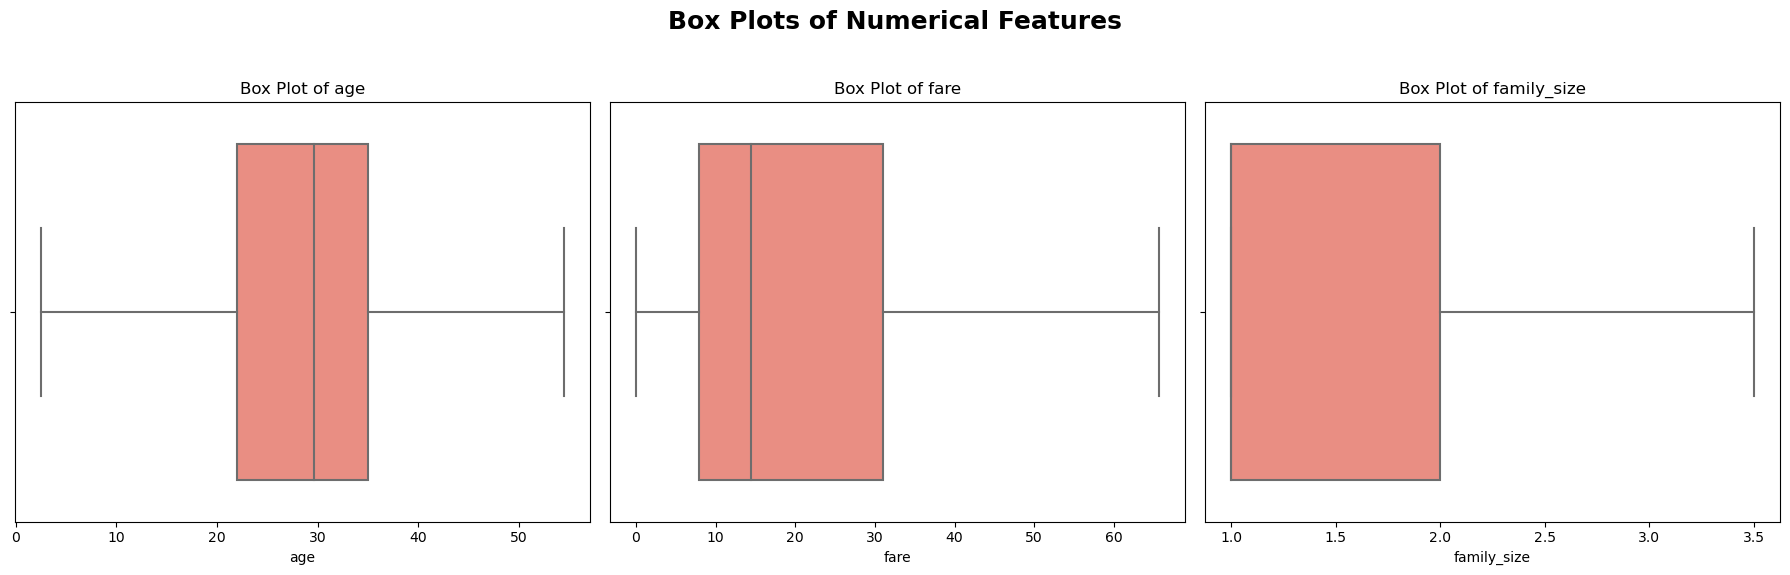

In [6]:
# Create a single row with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Set a shared title
fig.suptitle("Box Plots of Numerical Features", fontsize=18, weight='bold')

# Loop through each feature and its corresponding axis
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df1, x=feature, ax=ax[i], color='salmon')
    ax[i].set_title(f'Box Plot of {feature}')
    ax[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- There are no outliers in age, fare and family_size

#### Violin Plots

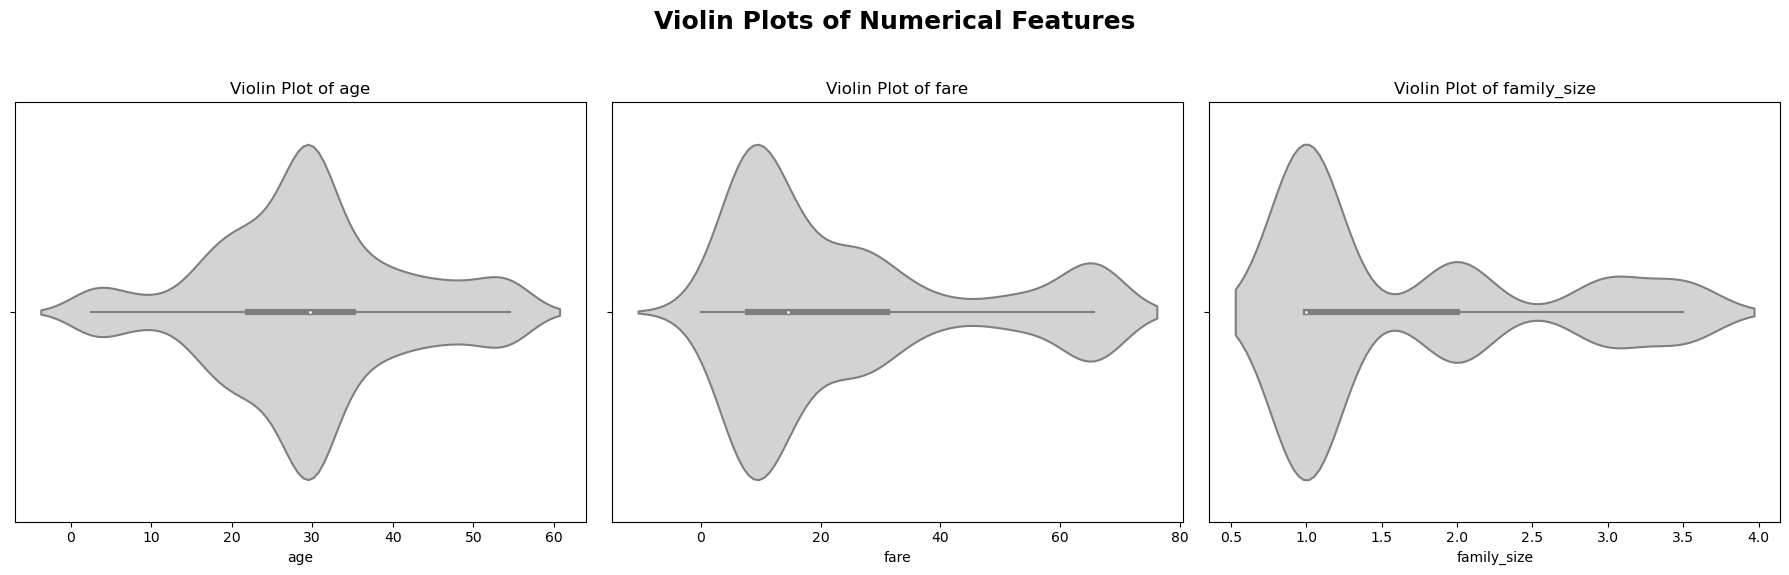

In [7]:
# Create a single row with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Set a shared title
fig.suptitle("Violin Plots of Numerical Features", fontsize=18, weight='bold')

# Loop through each feature and its corresponding axis
for i, feature in enumerate(numerical_features):
    sns.violinplot(data=df1, x=feature, ax=ax[i], color='lightgrey')
    ax[i].set_title(f'Violin Plot of {feature}')
    ax[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- It has the same analysis that we got from the kde plots

#### 2.1.1 Univariate Analysis for Categorical Features

#### Count Plots

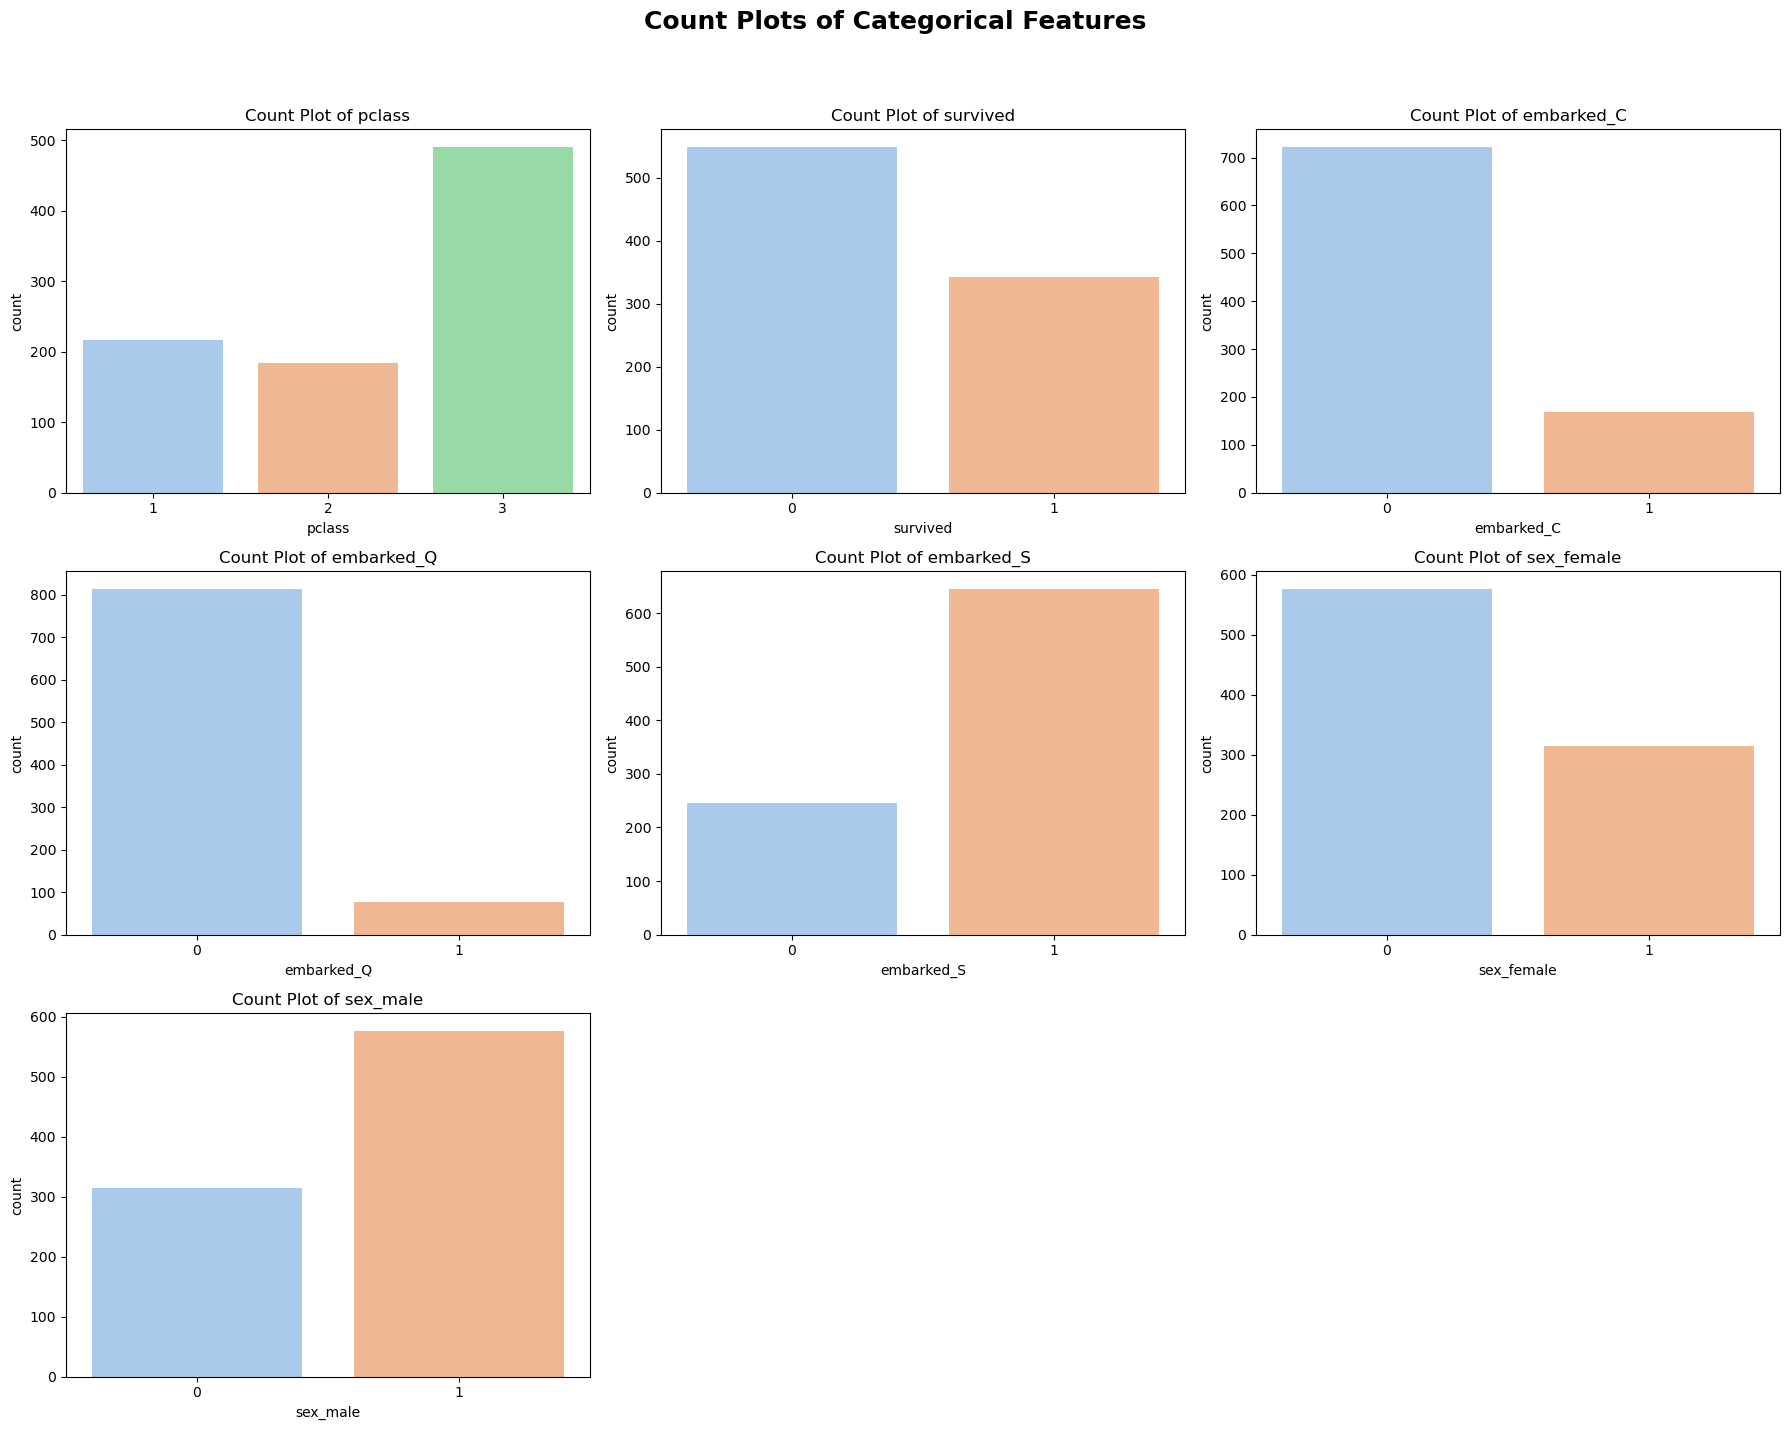

In [8]:
import math

# Set number of features to plot (e.g., all of them)
features_to_plot = categorical_features

# Dynamically determine columns and rows
n = len(features_to_plot)
cols = 3
rows = math.ceil(n / cols)

fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle("Count Plots of Categorical Features", fontsize=18, weight='bold')

# Flatten the axis array for easy indexing
ax = ax.flatten()

for i, feature in enumerate(features_to_plot):
    sns.countplot(data=df1, x=feature, ax=ax[i], palette="pastel")
    ax[i].set_title(f'Count Plot of {feature}')
    ax[i].set_xlabel(feature)

# Turn off unused axes
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Highest number of Passengers are from class 3
- Highest number of Passengers embarked from Q
- Highest number of Passengers are male
- Highest number of Passengers who survived are female

#### Bar Plots

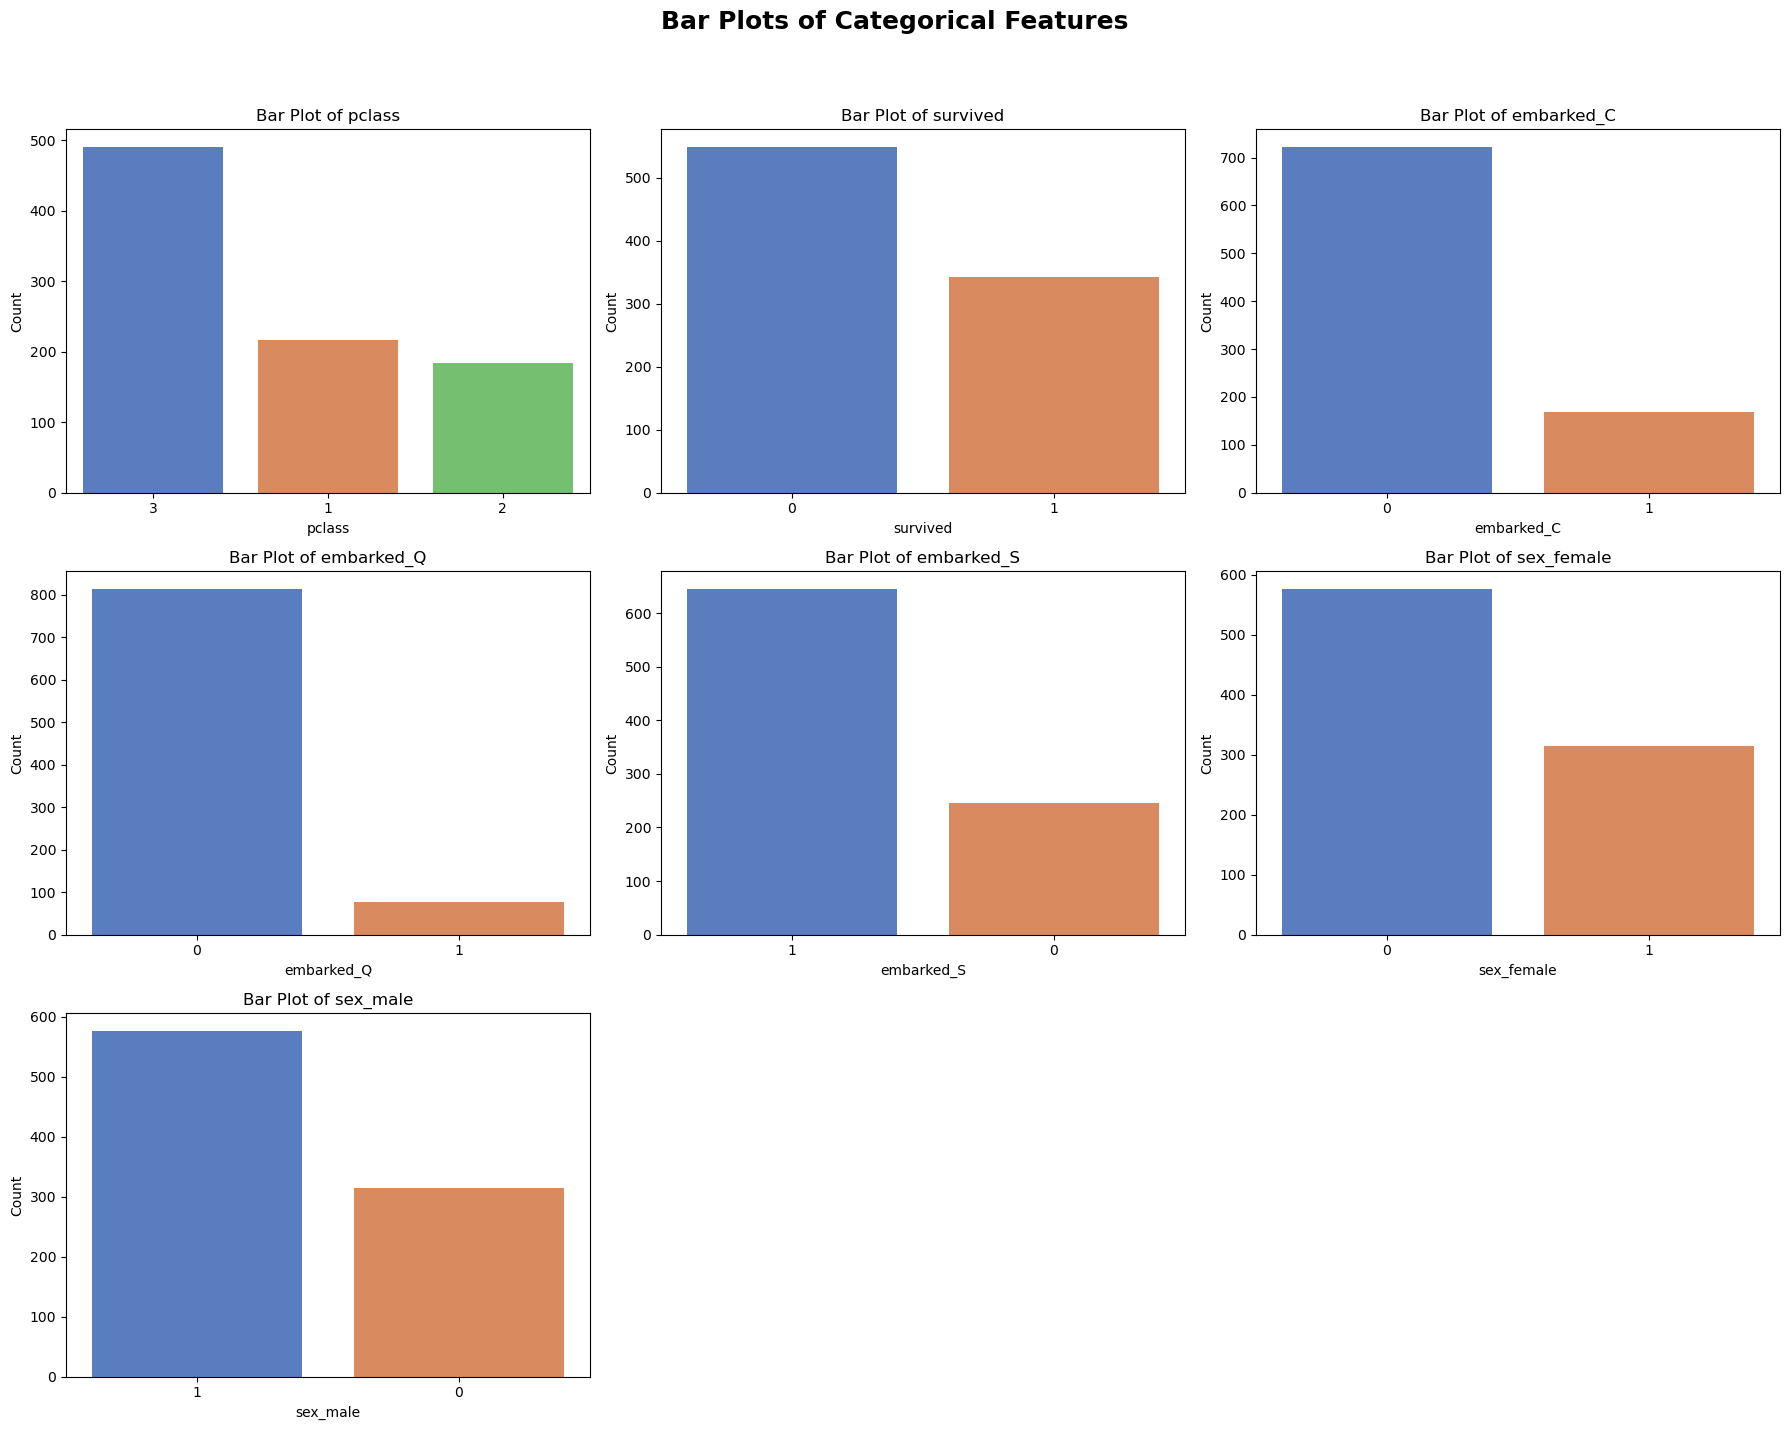

In [9]:
# Set number of features to plot
features_to_plot = categorical_features

# Dynamically calculate rows & columns
n = len(features_to_plot)
cols = 3
rows = math.ceil(n / cols)

fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle("Bar Plots of Categorical Features", fontsize=18, weight='bold')

ax = ax.flatten()

for i, feature in enumerate(features_to_plot):
    freq = df1[feature].value_counts()
    sns.barplot(x=freq.index.astype(str), y=freq.values, ax=ax[i], palette="muted")
    ax[i].set_title(f'Bar Plot of {feature}')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(feature)

# Hide unused subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- We get the same information as from the count Plots

#### Pie Charts 

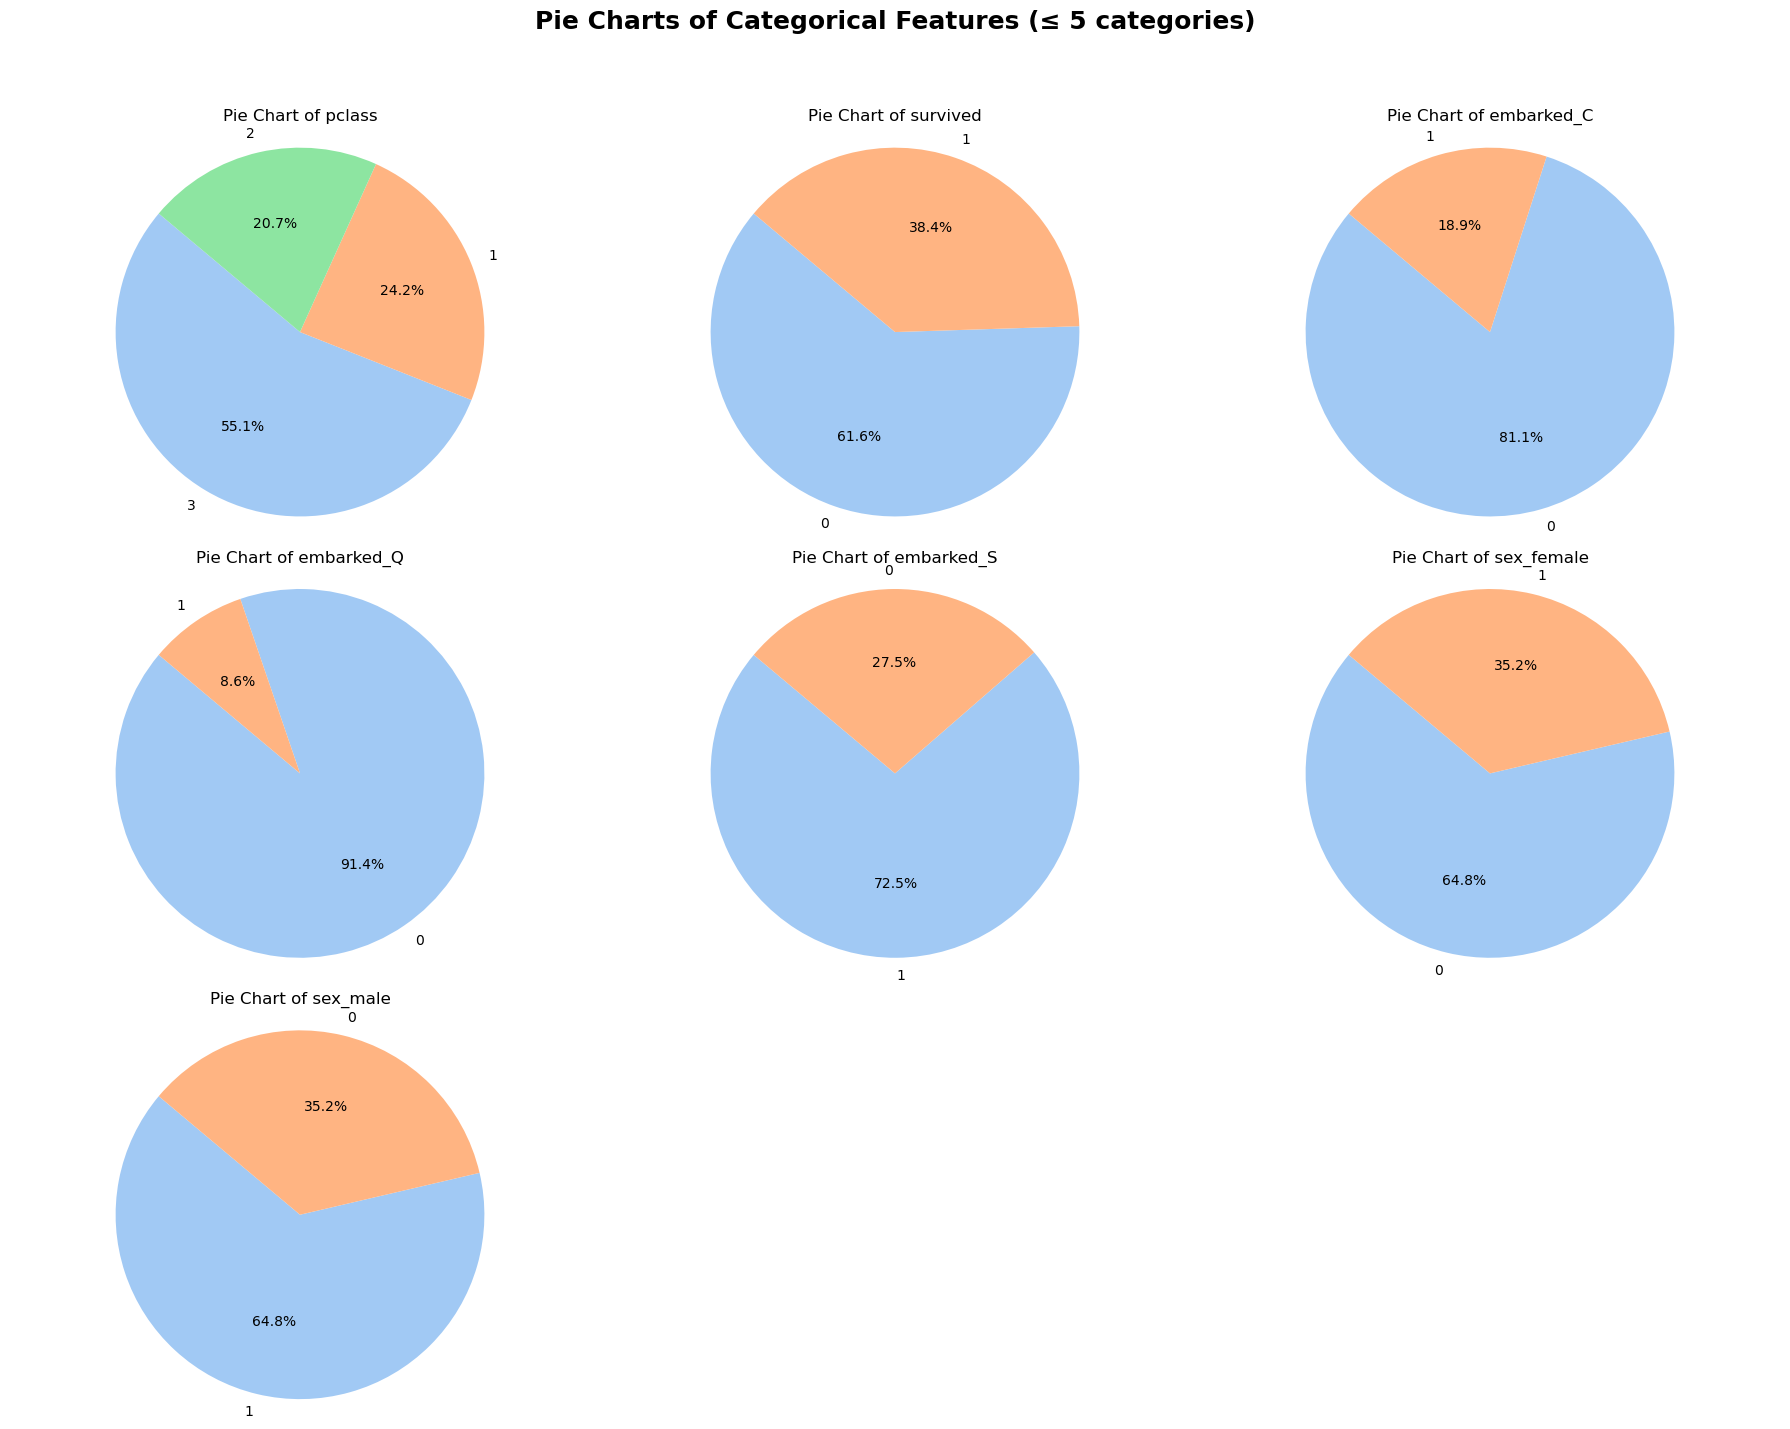

In [10]:
# Set number of features to plot
features_to_plot = categorical_features

# Dynamically calculate rows & columns
n = len(features_to_plot)
cols = 3
rows = math.ceil(n / cols)

fig, ax = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
fig.suptitle("Pie Charts of Categorical Features (≤ 5 categories)", fontsize=18, weight='bold')

ax = ax.flatten()

for i, feature in enumerate(features_to_plot):
    freq = df1[feature].value_counts()
    
    if df1[feature].nunique() <= 5:
        ax[i].pie(freq, labels=freq.index.astype(str), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
        ax[i].axis('equal')
        ax[i].set_title(f'Pie Chart of {feature}')
    else:
        ax[i].axis('off')
        ax[i].text(0.5, 0.5, 'Too many categories', ha='center', va='center', fontsize=10)

# Hide any remaining empty subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- It's again the same information but in percentage and pie chart form

#### 2.2 Multivariate Analysis 

#### 2.2.1 Multivariate Analysis - Numerical vs Numerical

In [11]:
print(df1['family_size'].describe())
print(df1['family_size'].unique())

count    891.000000
mean       1.664983
std        0.914151
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.500000
Name: family_size, dtype: float64
[2.  1.  3.5 3. ]


In [12]:
df1['family_size'] = df1['family_size'].clip(lower=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to avoid modifying the original
df_for_plot = df1.copy()

# Scale family_size to be between 5 and 30 for good bubble sizes
scaler = MinMaxScaler(feature_range=(5, 30))
df_for_plot['family_size_scaled'] = scaler.fit_transform(df_for_plot[['family_size']])

#### Scatter Plots

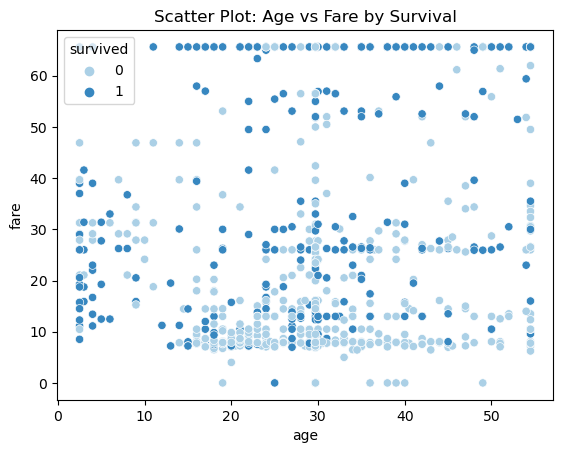

In [14]:
import plotly.express as px
import numpy as np

# Scatter Plots (Numerical vs Numerical)
sns.scatterplot(data=df1, x='age', y='fare', hue='survived', palette='Blues')
plt.title('Scatter Plot: Age vs Fare by Survival')
plt.show()

#### Pair Plots

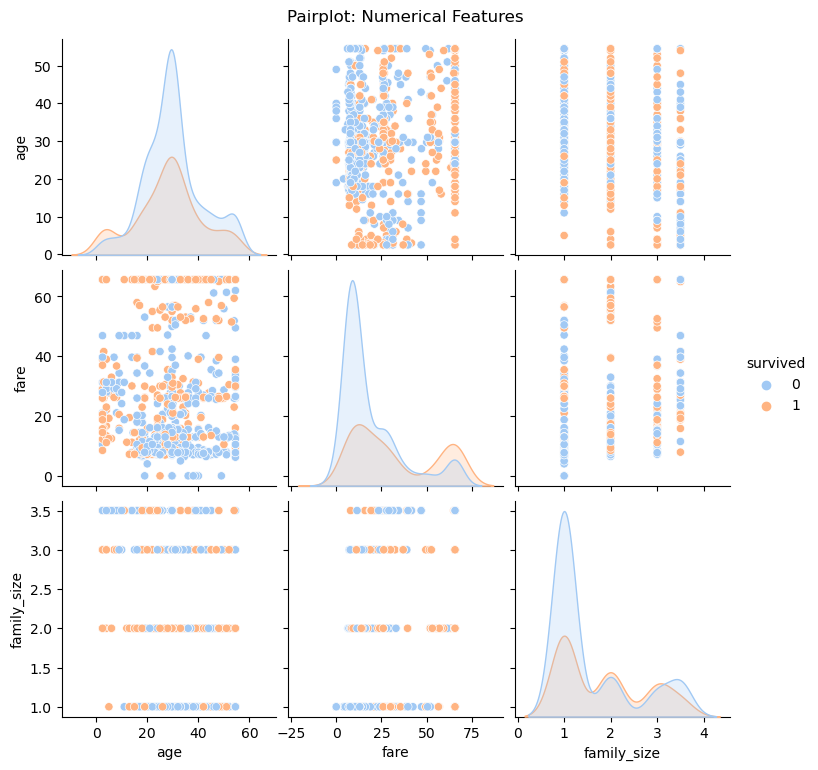

In [15]:
# Pairplots (Seaborn) - Visualizing multiple numerical features pairwise
sns.pairplot(df1[numerical_features+['survived']], hue='survived', palette='pastel')
plt.suptitle('Pairplot: Numerical Features', y=1.02)
plt.show()

#### Heat Map

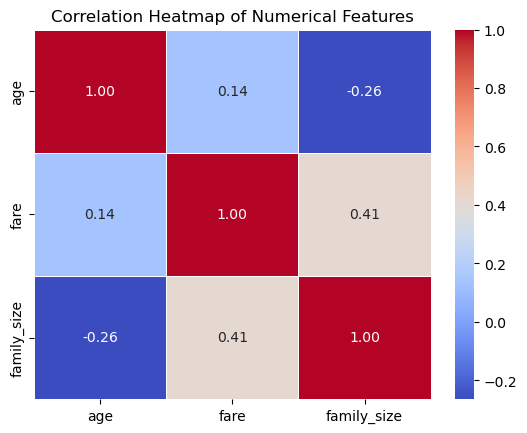

In [16]:
# Correlation Heatmaps - Correlation Matrix of numerical features
corr = df1[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Bubble Charts

In [17]:
# Bubble Charts (Plotly) - Visualizing relationship between Age, Fare, and Family Size with bubble size as Family Size
#fig = px.scatter(df1, x='age', y='fare', size='family_size', color='survived', title="Bubble Chart: Age vs Fare with Family Size as Bubble Size")
#fig.show()

In [18]:
import plotly
print(plotly.__version__)

6.0.1


#### 2.2.2 Multivariate Analysis - Categorical vs Numerical

#### Box Plots

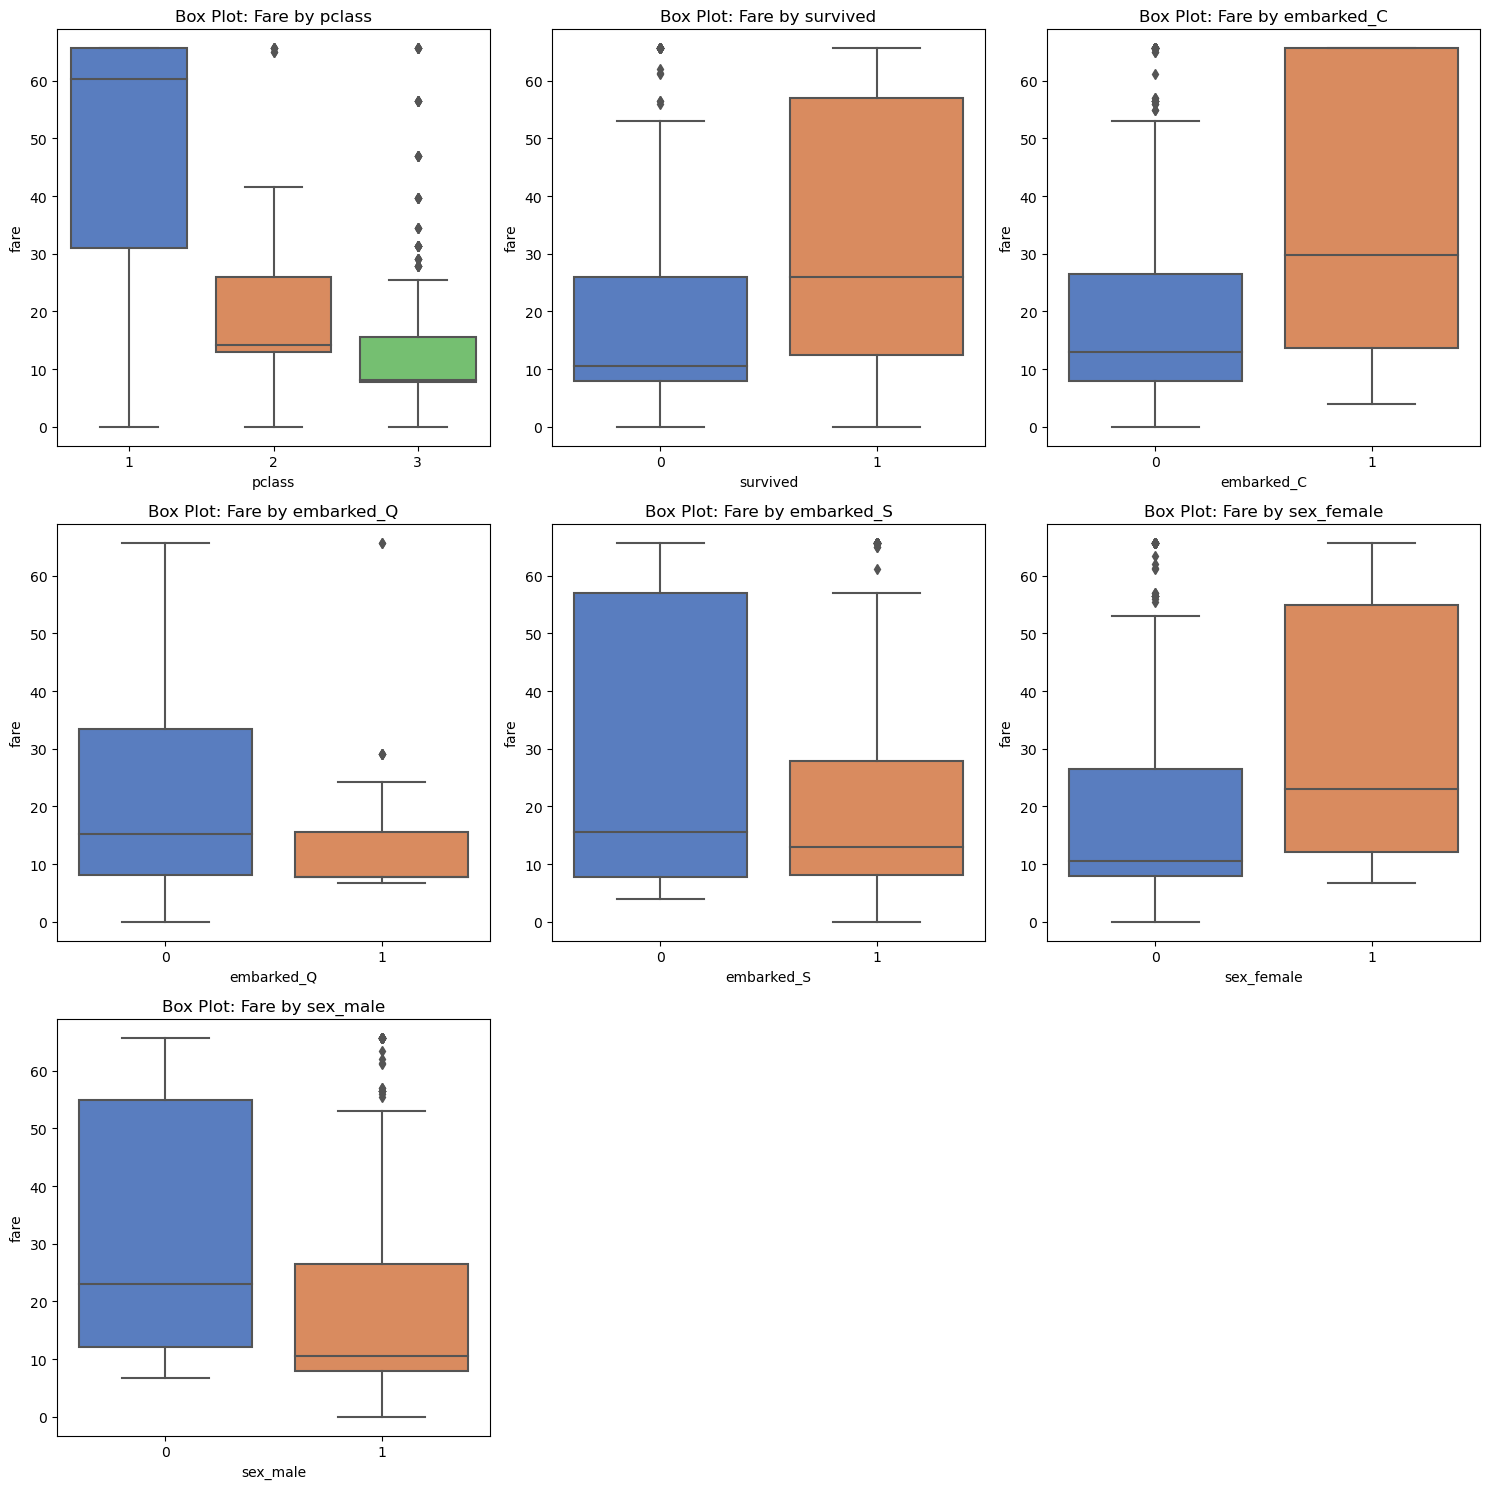

In [19]:
# Calculate the number of rows and columns based on the total number of box plots
num_box_plots = len(categorical_features)
num_columns = 3
num_rows = (num_box_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot box plots
for feature in categorical_features:
    # Choose the axis for plotting
    ax = axes[plot_index]
    sns.boxplot(data=df1, x=feature, y='fare', palette="muted", ax=ax)
    ax.set_title(f'Box Plot: Fare by {feature}')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

--Violin/Swarm plots--

for feature in categorical_features:

    plt.figure(figsize=(8, 6))
    
    sns.violinplot(data=df1, x=feature, y='age', palette="muted")
    
    plt.title(f'Violin Plot: Age by {feature}')
    
    plt.show()

    sns.swarmplot(data=df1_standardized, x=feature, y='fare', palette="pastel", alpha=0.6)
    
    plt.title(f'Swarm Plot: Fare by {feature}')
    
    plt.show()

#### Strip Plots 

C:\Users\HP\AppData\Local\Temp\ipykernel_4080\3841715178.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_4080\3841715178.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_4080\3841715178.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_4080\3841715178.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_4080\38

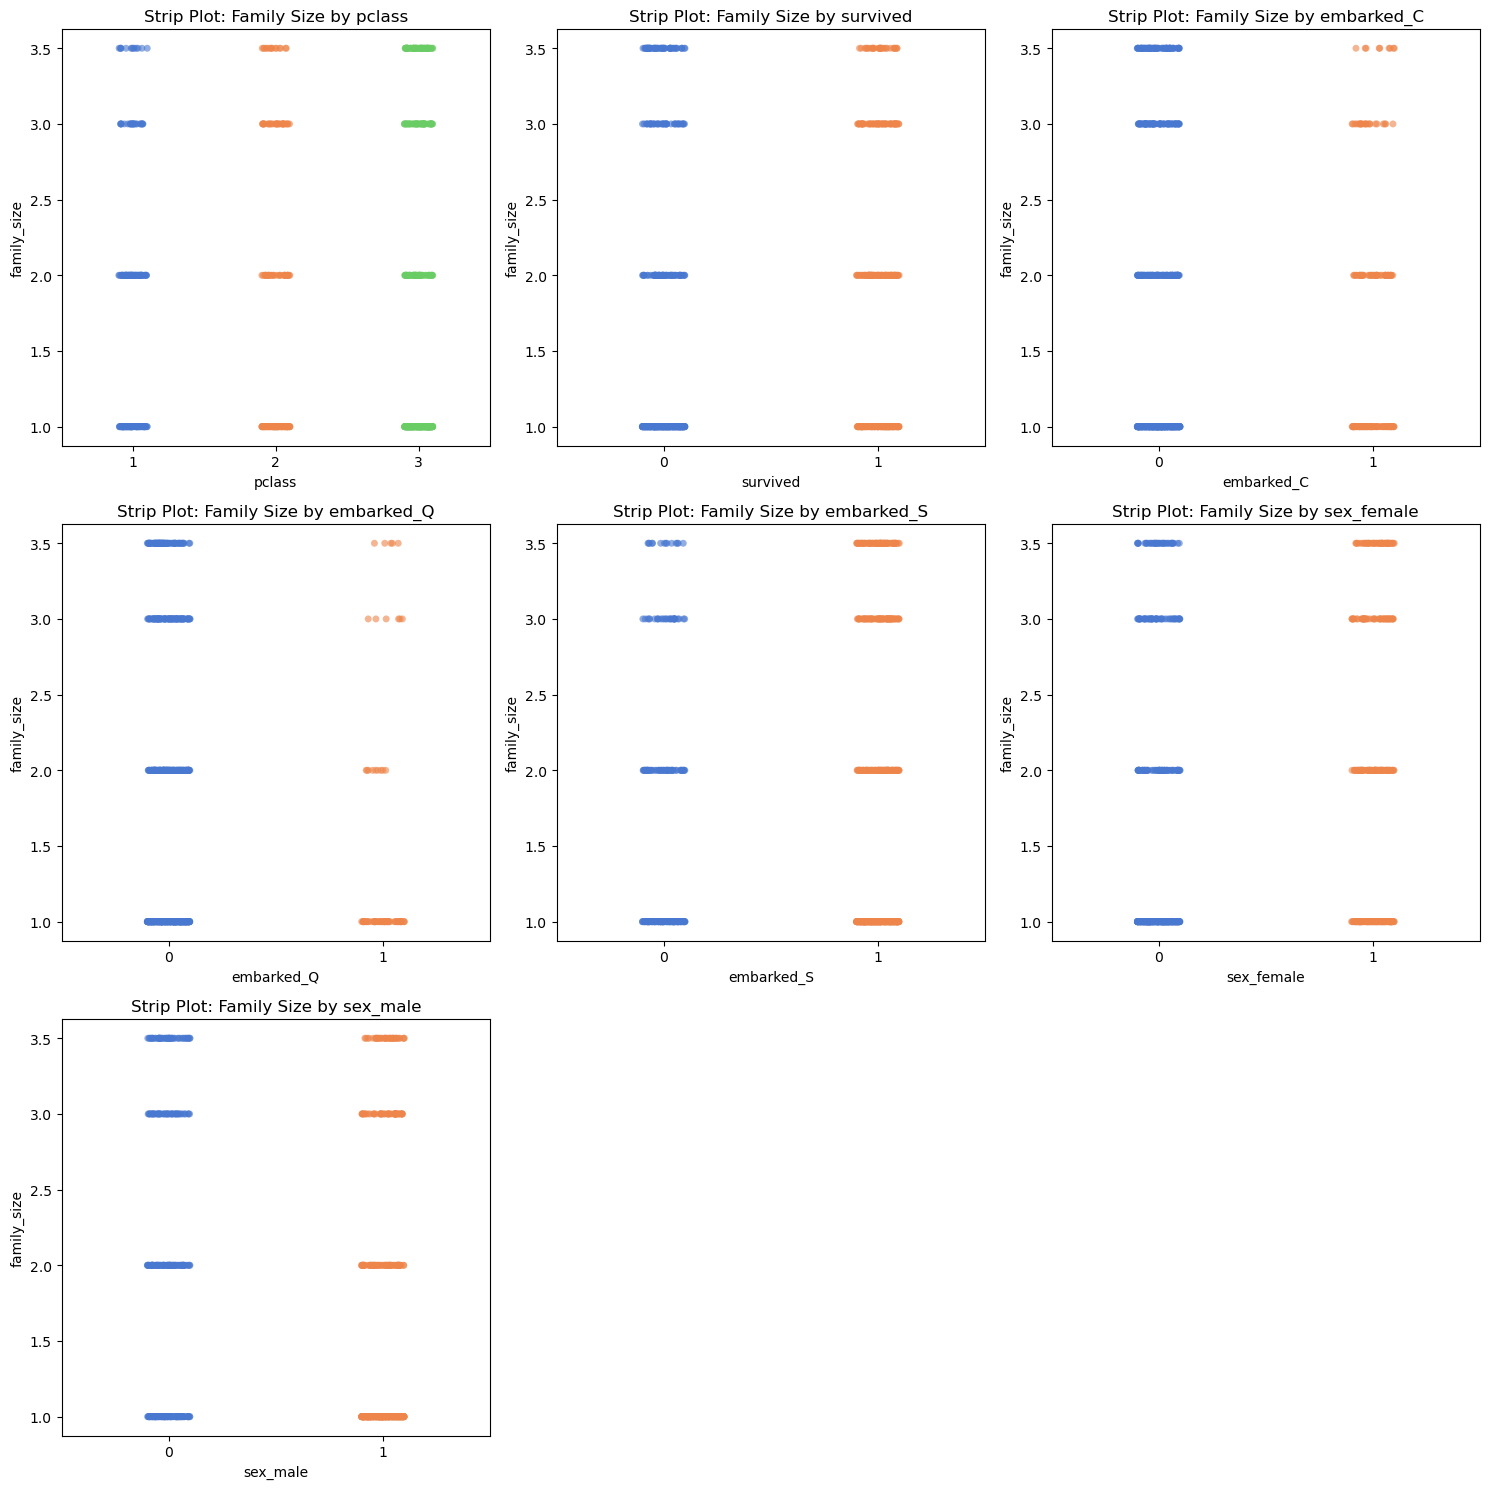

In [20]:
# Calculate the number of rows and columns based on the total number of strip plots
num_plots = len(categorical_features)  # 1 plot for each feature
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot strip plots
for feature in categorical_features:
    # Strip Plot
    ax = axes[plot_index]
    sns.stripplot(data=df1, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
    ax.set_title(f'Strip Plot: Family Size by {feature}')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### 2.2.3 Multivariate Analysis - Categorical vs Numerical

#### Stacked Bar charts

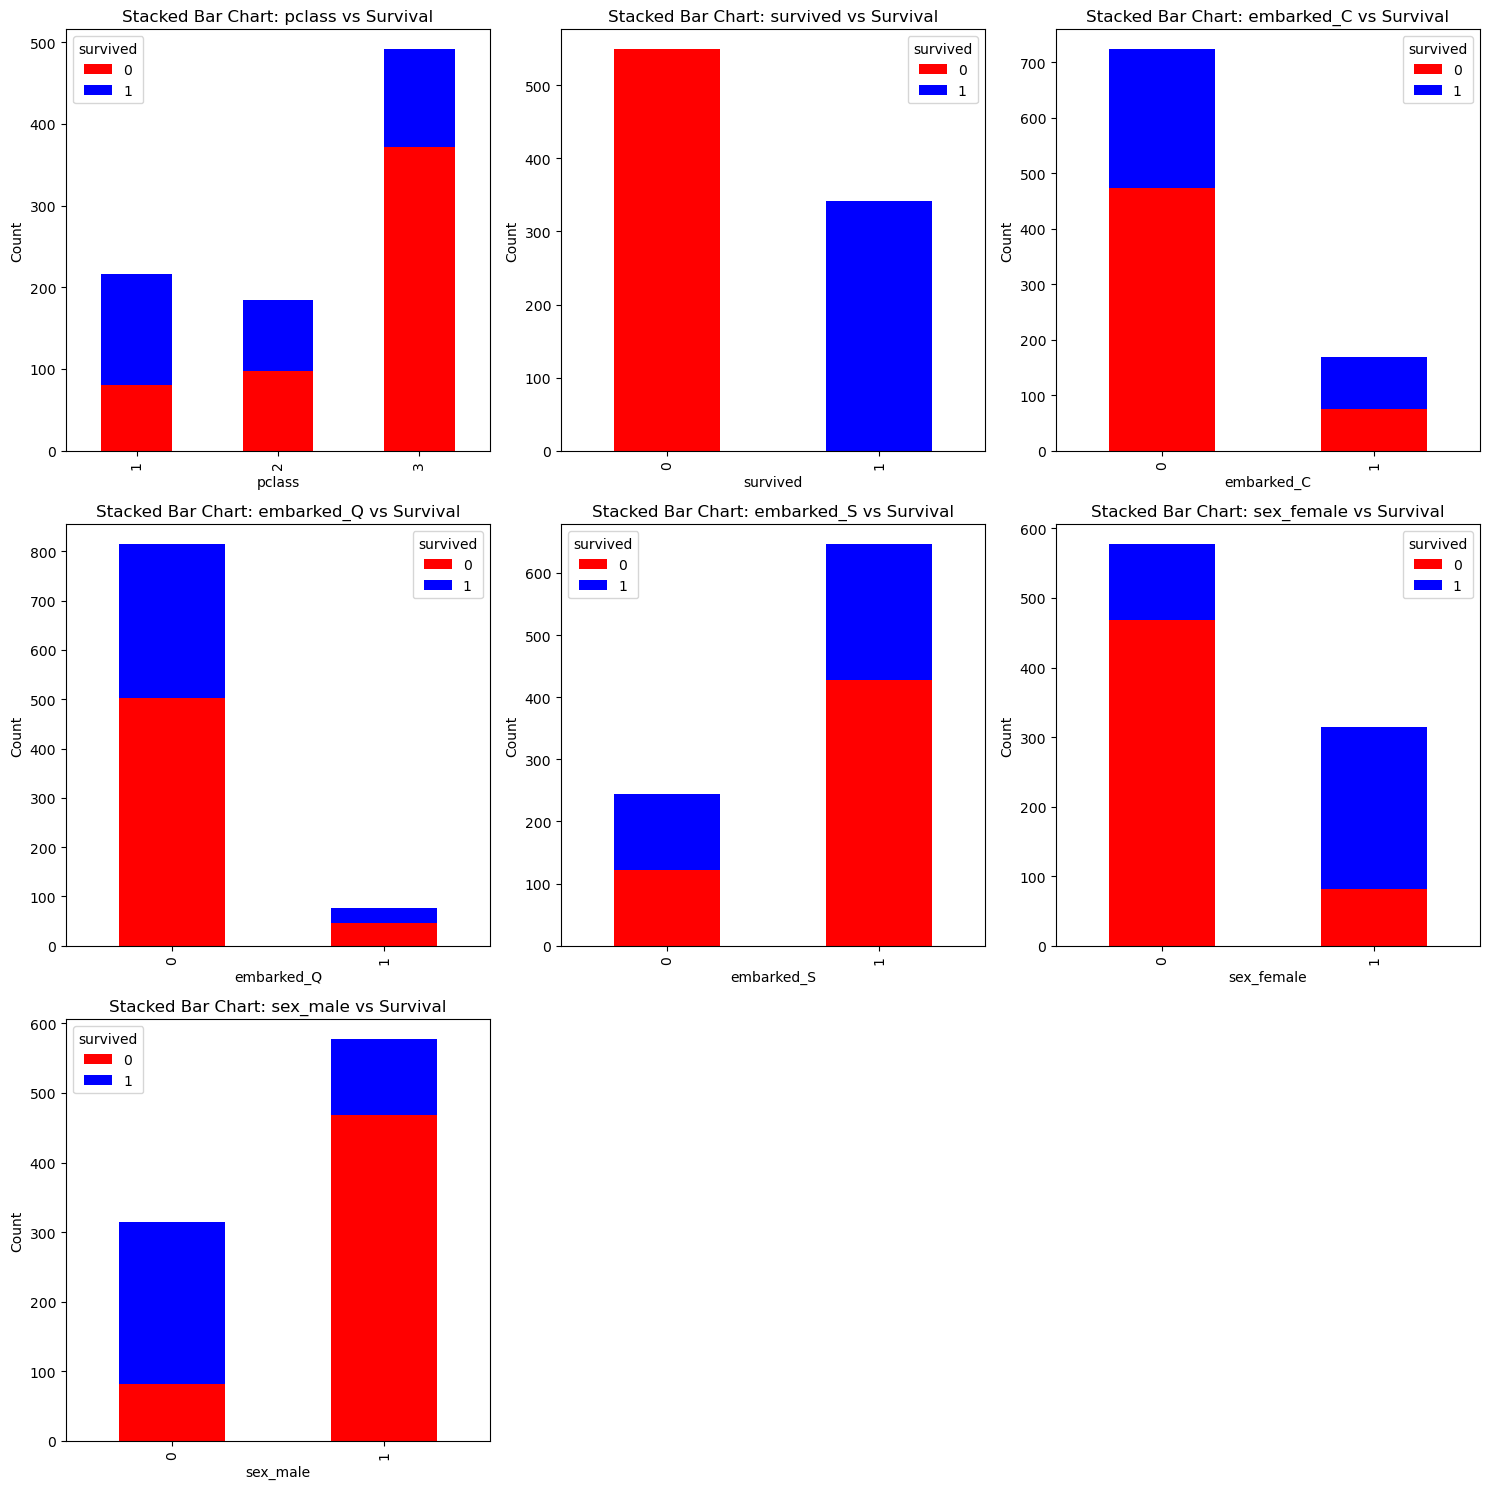

In [21]:
# Calculate the number of rows and columns based on the total number of stacked bar charts
num_plots = len(categorical_features)  # 1 plot for each feature
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot stacked bar charts
for feature in categorical_features:
    crosstab = pd.crosstab(df1[feature], df1['survived'])
    
    # Stacked Bar Chart
    ax = axes[plot_index]
    crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax)
    ax.set_title(f'Stacked Bar Chart: {feature} vs Survival')
    ax.set_ylabel('Count')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Heatmap of Crosstabs

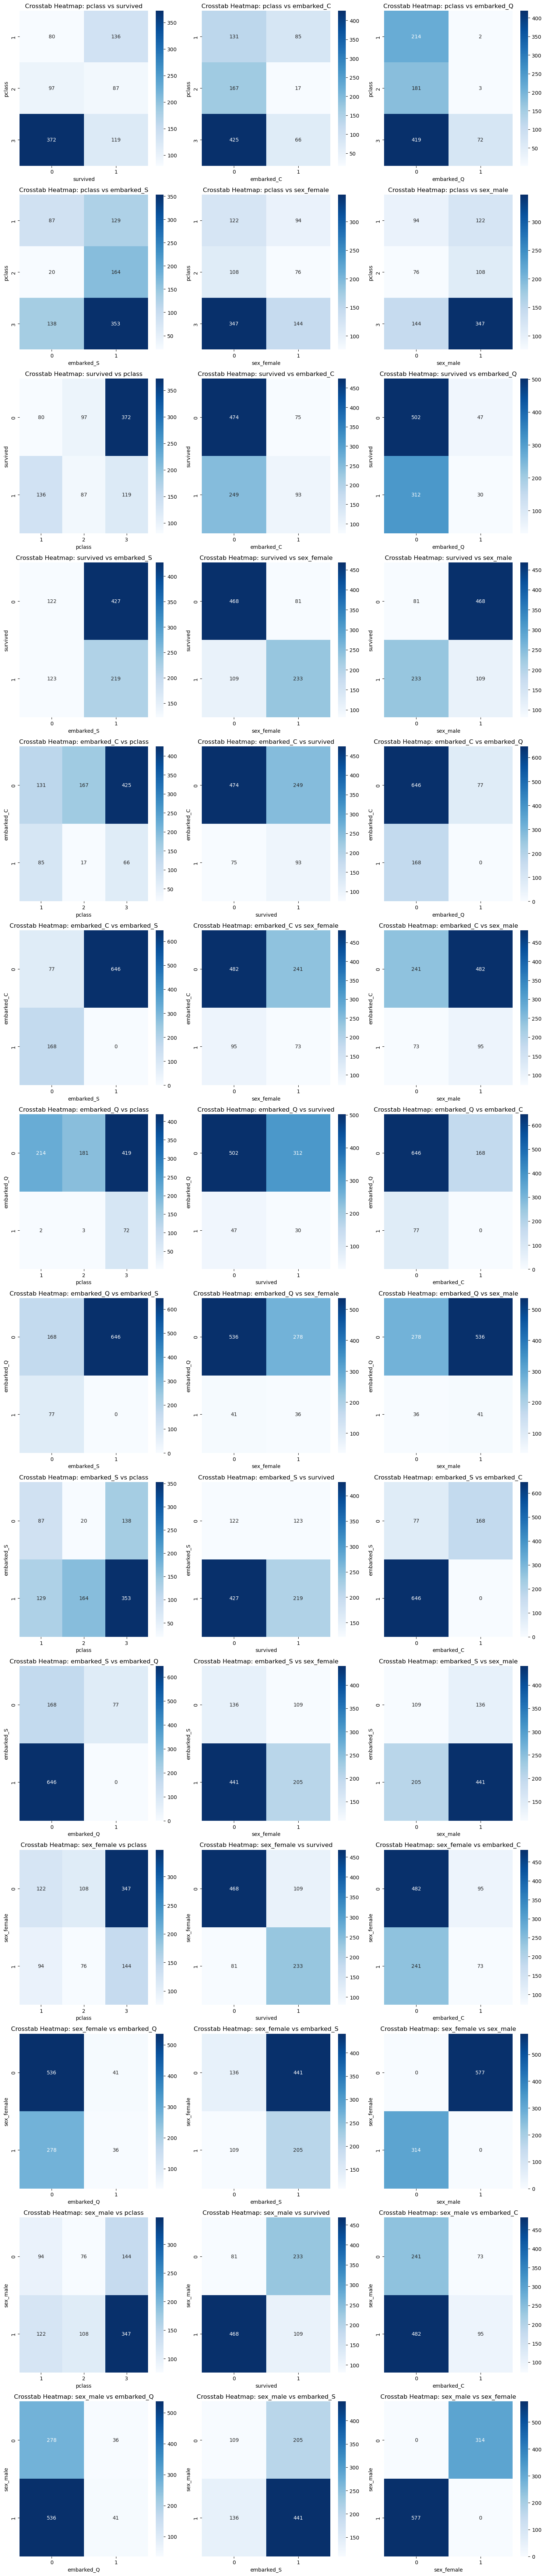

In [22]:
# Calculate the number of rows and columns based on the total number of heatmaps
num_heatmaps = len(categorical_features) * (len(categorical_features) - 1)
num_columns = 3
num_rows = (num_heatmaps + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical feature pairs and plot heatmaps
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            crosstab = pd.crosstab(df1[feature1], df1[feature2])
            
            # Choose the axis for plotting
            ax = axes[plot_index]
            sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', ax=ax)
            ax.set_title(f'Crosstab Heatmap: {feature1} vs {feature2}')
            
            # Move to the next plot
            plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- What we have till now is basically plotting all the graphs possible, which is exhaustive and doesn't actually give key insights easily.
- So, that is why, we now are doing the Feature Importance
- Since we have small number of features, we could choose manually by simple correaltion analysis.

### More details about the following methods can be found in :

https://github.com/Chaiithra/Complete-Advanced-EDA/tree/main/Feature%20Importances 

### 3.Feature Importance 

#### 3.1 Model-based Feature Importance
-- Importance score derived from model internals (weights, impurity, gain, etc.)
- Tree-based models (Decision Tree/ Random Forest/ Extra Trees Importance)
-  XGBoost/LightGBM/CatBoost Feature Importance
- Logistic regression (coefficients)
- SVM (Linear)

#### 3.2 Statistical Feature Importance (Correlational Methods)
-- Purely data-driven, pre-modeling filters

- Correlation (Pearson, Spearman, Kendall)
- Mutual Information
- Chi-Square Test (for categorical target)
- ANOVA F-test
- Variance Threshold
- Maximal Information Coefficient (MIC)
- Kolmogorov-Smirnov Statistic

#### 3.3 Dimentionality Reduction-based Techniques
-- Feature projections and transformation-based importance

- Principal Component Analysis (PCA)
- t-SNE (for visualization, not selection)
- UMAP
- Autoencoder Feature Compression
- Factor Analysis

#### 3.4 Regularization-based Feature Importance
-- Penalty-induced sparsity methods

- Lasso Regression (L1 penalty)
- Ridge Regression (L2 - not for selection but for shrinkage)
- Elastic Net
- Group Lasso (if features are grouped)
- LARS (Least Angle Regression)

#### 3.5 Advanced & Research-based Techniques
-- High-value academic & ensemble techniques

- Boruta Algorithm
- Recursive Feature Elimination (RFE)/ RFECV
- Stability Selection
- Drop-Column Importance
- SHAP (all types)
- LIME
- Permutation Importance
- PDP
- ReliefF
- MRMR (Minimum Redundancy Maximum Relevance)
- Leave-One-Covariate-Out (LOCO)
- Forward/Backward Sequential Feature Selection

#### 3.6 Neural Network Specific Methods
-- Gradient & attention-based importance
- Integrated Gradients
- Saliency Maps / Grad-CAM
- Attention Weights (NLP/Transformers)
- DeepLIFT
- Attention Weights (NLP/Transformers)
- DeepSHAP
- Layer-wise Relevance Propagation (LRP)

#### 3.7 Feature Importance via Surrogate Models
-- Train interpretable models on complex ones

- Surrogate Decision Trees (on ensemble or neural nets)
- Linear Approximation of Non-linear Models
- Local Surrogate Models (e.g., in LIME)
- Model Distillation-based Attribution

#### 3.8 Meta / Consensus Techniques
-- Aggregate rankings across multiple methods

- Rank Aggregation Across Methods
- Weighted Voting of Feature Ranks
- Clustering Importance Scores
- Consensus Stability Score across folds/methods
- SHAP + RFE + Correlation Overlay (hybrid consensus)

In [23]:
df1.head(3)

,passenger_id,survived,pclass,name,age,ticket,fare,family_size,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,2.0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,65.6344,2.0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1.0,0,0,1,1,0


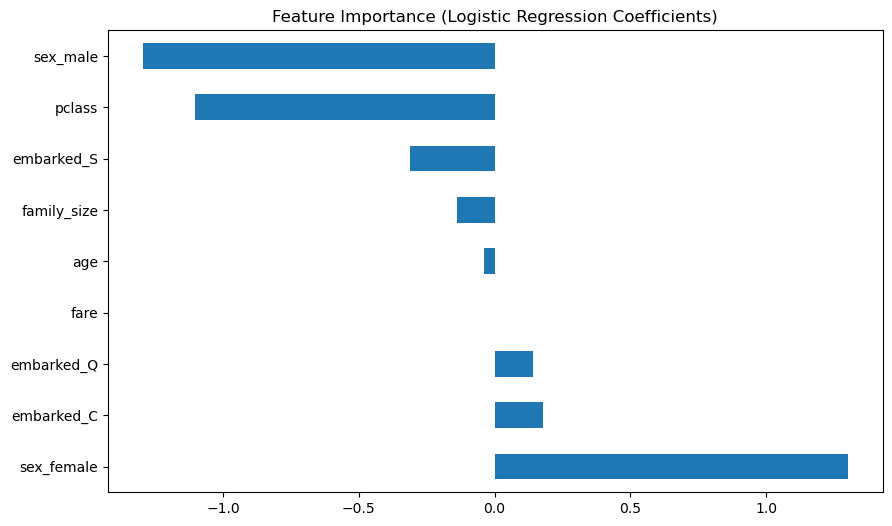

In [24]:
from sklearn.linear_model import LogisticRegression

x = df1.drop(columns=['survived', 'name','ticket','passenger_id']) 
y = df1['survived']

model = LogisticRegression(max_iter=1000)
model.fit(x, y)

# Get feature importance
importance = pd.Series(model.coef_[0], index=x.columns)
importance.sort_values(ascending=False).plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

- sex_female has strong +ve influence
- sex_male has strong -ve influence
- age & family_size mildly -ve influence